## INPUT VARIABLES:



# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical:"divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")
  
  
  
  
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical:"cellular","telephone") 

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). 


Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.




# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
 
 

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [82]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv("./datasets/bank-additional/bank-additional/bank-additional-full.csv",sep=';')

In [84]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## LABEL ENCODING

In [86]:
from sklearn import preprocessing
classes = ['y','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
le = [preprocessing.LabelEncoder() for ix in range(11)]
for ix in range(11):
    le[ix].fit_transform(data[classes[ix]])
    data[classes[ix]] = le[ix].transform(data[classes[ix]])
data.head()
datanp = np.array(data)

In [106]:
X = datanp[:,:-1]
y = datanp[:,-1]
# Build a forest and compute the feature importances
forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_
for ix in range(20):
    print(data.columns[ix],"\t",importances[ix])

/home/ramendra/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


age 	 0.09383562253501164
job 	 0.04857870269274701
marital 	 0.02279157483208689
education 	 0.042898886773005726
default 	 0.00840770093603409
housing 	 0.020614661539153083
loan 	 0.014679562362724694
contact 	 0.009974121553021943
month 	 0.017635391253318485
day_of_week 	 0.039955776765441285
duration 	 0.3274899873020274
campaign 	 0.04254929570192763
pdays 	 0.013139723841539542
previous 	 0.014702334994580249
poutcome 	 0.033462857898517565
emp.var.rate 	 0.007639125216521513
cons.price.idx 	 0.026229328610367243
cons.conf.idx 	 0.030724914630240813
euribor3m 	 0.10315915701031317
nr.employed 	 0.08153127355142006


# OPTIMIZATION BY DURATION

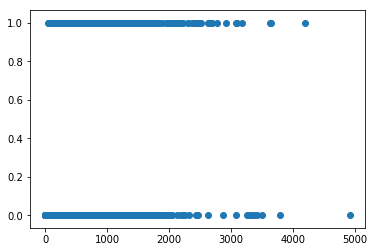

In [88]:
plt.scatter(data['duration'],data['y'])

In [89]:
data['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [90]:
# le[0].transform(['yes'])
dut = np.array([ix for ix in range(0,5100,100)])
dut

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000])

In [127]:
for ix in range((dut.shape[0])-1):
    num = float(data.loc[(data['duration']>dut[ix]) & (data['duration']<=dut[ix+1]) & (data['y']==1)].shape[0])
    den = float(data.loc[(data['duration']>dut[ix]) & (data['duration']<=dut[ix+1])].shape[0]+0.1)
    print(num/den, "\t", num)

0.008081332122796341 	 81.0
0.05018416567842866 	 639.0
0.11046358715964617 	 798.0
0.14356080295042203 	 580.0
0.19855999284468495 	 444.0
0.28276757052113927 	 414.0
0.3747164973868455 	 380.0
0.42850959457509735 	 297.0
0.5187985717286284 	 247.0
0.5967394647800677 	 194.0
0.5854241338112306 	 147.0
0.5101509630400833 	 98.0
0.6040268456375839 	 81.0
0.6886517943743938 	 71.0
0.5706134094151213 	 40.0
0.617059891107078 	 34.0
0.7717041800643086 	 24.0
0.5759162303664921 	 11.0
0.5809128630705394 	 14.0
0.4678362573099415 	 8.0
0.794701986754967 	 12.0
0.49180327868852464 	 3.0
0.5882352941176471 	 3.0
0.6451612903225806 	 2.0
0.7042253521126761 	 5.0
0.9090909090909091 	 1.0
0.7843137254901962 	 4.0
0.9090909090909091 	 1.0
0.0 	 0.0
0.9090909090909091 	 1.0
0.6451612903225806 	 2.0
0.9090909090909091 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.9523809523809523 	 2.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.9090909090909091 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.

In [92]:
num = float(data.loc[(data['duration']<=100) & (data['campaign']>1) & (data['y']==1)].shape[0])
den = float(data.loc[(data['duration']<=100) & (data['campaign']>1) ].shape[0])
num/den

0.005401866099197905

In [93]:
extra_calls = np.sum(data.loc[(data['duration']<=100) & (data['campaign']>1) ]['campaign'])-data.loc[(data['duration']<=100) & (data['campaign']>1) ]['campaign'].shape[0]

In [94]:
total_calls = np.sum(data['campaign'])

In [95]:
extra_calls/total_calls

0.22468180872591106

In [96]:
num = data.loc[((data['duration']>100) & (data['y']==1)) | ((data['duration']<=100) & (data['y']==1) & (data['campaign']==1))].shape[0]
den = data.loc[(data['y']==1)].shape[0]
num/den

0.9928879310344828

## Hence a reduction of 22.47% in marketing cost can be achieved while maintaining 99.29% sales if the customer with duration less than 100 seconds is not called again

In [97]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [98]:
agea = np.array([ix for ix in range(0,110,20)])
agea

array([  0,  20,  40,  60,  80, 100])

In [105]:
for ix in range((agea.shape[0])-1):
    num = data.loc[(data['age']>agea[ix]) & (data['age']<=agea[ix+1]) & (data['y']==1)].shape[0]
    den = data.loc[(data['age']>agea[ix]) & (data['age']<=agea[ix+1])].shape[0]
    print(num/den,"\t",num)

0.40714285714285714 	 57
0.1127475876079228 	 2664
0.09115687462144155 	 1505
0.44879898862199746 	 355
0.4957983193277311 	 59


# Therefore, we observe no pattern in age, hence we have no observations based on age

In [107]:
data['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [109]:
interest =np.array([ix for ix in range(7)])
for ix in range((interest.shape[0])-1):
    num = data.loc[(data['euribor3m']>interest[ix]) & (data['euribor3m']<=interest[ix+1]) & (data['y']==1)].shape[0]
    den = float(data.loc[(data['euribor3m']>interest[ix]) & (data['euribor3m']<=interest[ix+1])].shape[0]+0.1)
    print(num/den,"\t",num)

0.4569995650060132 	 1786
0.15797541214377325 	 1515
0.0 	 0
0.07092198581560284 	 1
0.04817996826555729 	 1333
0.5494505494505495 	 5


# Therefore ,we again observe no pattern with euribor3m

In [110]:
data['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

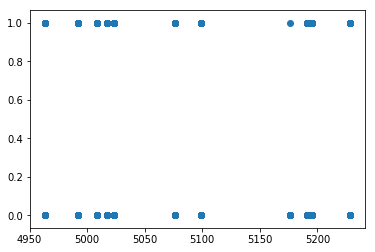

In [111]:
plt.scatter(data['nr.employed'],data['y'])

In [112]:
emp =np.array([ix for ix in range(4950,5300,50)])
for ix in range((emp.shape[0])-1):
    num = data.loc[(data['nr.employed']>emp[ix]) & (data['nr.employed']<=emp[ix+1]) & (data['y']==1)].shape[0]
    den = float(data.loc[(data['nr.employed']>emp[ix]) & (data['nr.employed']<=emp[ix+1])].shape[0]+0.1)
    print(num/den,"\t",num)

0.49996449115829844 	 704
0.4812212772700861 	 911
0.16534112639868198 	 1686
0.0 	 0
0.04128804741578722 	 473
0.053344503237013445 	 866


# Therefore ,we again observe no pattern with nr.employed

In [113]:
data['education'].describe()

count    41188.000000
mean         3.747184
std          2.136482
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: education, dtype: float64

In [118]:
edu =np.array([ix for ix in range(8)])
for ix in range((emp.shape[0])):
    num = data.loc[(data['education']==edu[ix])& (data['y']==1)].shape[0]
    den = float(data.loc[(data['education']==edu[ix])].shape[0])
    print(num/den,"\t",num)

0.1024904214559387 	 428
0.08202443280977312 	 188
0.0782464846980976 	 473
0.10835522858644246 	 1031
0.2222222222222222 	 4
0.11348464619492657 	 595
0.13724523339907954 	 1670


In [119]:
# We observe that for edu[3], the response rate is very low
le[3].inverse_transform([4])

array(['illiterate'], dtype=object)

In [122]:
num = np.sum(data.loc[(data['education']==4)]['campaign'])

41

In [123]:
total_calls = np.sum(data['campaign'])
num/total_calls

0.01579136486563156

In [126]:
1-(4/data.loc[data['y']==1].shape[0])

0.9991379310344828

## Hence, no significant change can efficiently save marketing cost, or maintain the sales, but we conclude that for further campaigns "Illitrates" can be avoided, and according the data we save 1.5% marketing cost, maintaining the sales to 99.91%

In [128]:
data['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

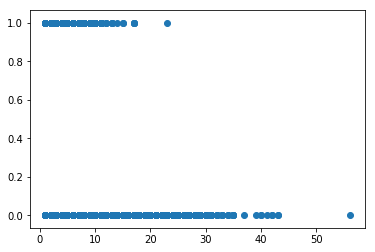

In [129]:
plt.scatter(data['campaign'], data['y'])

In [132]:
camp = np.array([ix for ix in range(1,57)])
edu =np.array([ix for ix in range(8)])
for ix in range((camp.shape[0])):
    num = data.loc[(data['campaign']==camp[ix])& (data['y']==1)].shape[0]
    den = float(data.loc[(data['campaign']==camp[ix])].shape[0]+0.1)
    print(num/den,"\t",num)

0.130369967294143 	 2300
0.11456845252173584 	 1211
0.10746849899833368 	 574
0.09392327713024783 	 249
0.07504221124382465 	 120
0.07660096006536615 	 75
0.06040375139087585 	 38
0.0424893776555861 	 17
0.060049452490286113 	 17
0.05330964015992892 	 12
0.06775832862789384 	 12
0.023980815347721823 	 3
0.04343105320304018 	 4
0.014471780028943561 	 1
0.03913894324853229 	 2
0.0 	 0
0.06884681583476764 	 4
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.06211180124223602 	 1
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0
0.0 	 0


In [141]:
extra_calls = np.sum(data.loc[(data['campaign']>6)]['campaign']-6)
extra_calls
total_calls = np.sum(data['campaign'])
extra_calls/total_calls

0.11384912154622993

In [143]:
num = data.loc[(data['campaign']<=6) & (data['y']==1)].shape[0]
den = data.loc[data['y']==1].shape[0]
num/den

0.9760775862068966

## Hence a reduction of 11.38% in marketing cost can be achieved while maintaining 97.60% sales if the customer is not called more than 6 times

## OVERALL OPTIMIZATION

In [146]:
e_calls = np.sum(data.loc[(data['campaign']>6) & (data['duration']>100)]['campaign']-6)
e_calls+=np.sum(data.loc[(data['duration']<=100) & (data['campaign']>1) ]['campaign'])-data.loc[(data['duration']<=100) & (data['campaign']>1) ]['campaign'].shape[0]
e_calls

28617

In [147]:
t_calls = np.sum(data['campaign'])
t_calls

105754

In [148]:
e_calls/t_calls

0.2705996936286098

In [149]:
num = data.loc[((data['duration']>100) & (data['campaign']<=6) & (data['y']==1)) | ((data['duration']<=100) & (data['y']==1) & (data['campaign']==1))].shape[0]
den = data.loc[(data['y']==1)].shape[0]
num/den

0.9691810344827586

## Hence a reduction of 27.06% in marketing cost can be achieved while maintaining 96.92% sales, by not calling more than 6 times to any customer, and not calling the customer again if the last call duration was not more than 100 seconds